# **Taller 4: Regresión Lineal.**

**Curso: 09481 - Inteligencia Artificial.**

**Universidad Icesi.**

**Profesor: Breyner Posso.**

**Estudiantes: Daniela Olarte - Duvan Cuero**

La regresión lineal es un algoritmo de apendizaje supervisado que busca encontrar una relación lineal entre una variable objetivo o variable dependiente y un conjuto de predictores o variables independientes.

Su principio de operación de basa en los mínimos cuadrados ordinarios (OLS, por las siglas en ingles Ordinary Least Squares).

En estadística, OLS es un método que se utiliza para estimar los parámetros de una función de regresión lineal, al minimizar la suma de las diferencias al cuadrado (MSE, por las siglas en inglés de Mean Square Error) entre la variable dependiente y el valor predicho por la función de la regresión lineal.

## Algoritmo

Para denotar las variables independientes se usará $\mathbf{x_i^{(j)}}$ y para la varible objetivo o dependiente se usará $\mathbf{y^{(j)}}$ . Un par $\mathbf{(x_i^{(j)},y^{(j)})}$ se denomina una muestra de entrenamiento. El subíndice **j** en la notación, es simplemente el índice de la observación en el conjunto de entrenamiento, el cual tiene **m** muestras, por lo tanto **j=1,2,3,...,m**. El subídice **i** en la notación, indica el índice del predictor en el conjunto de entrenamiento, el cual tiene **n** predictores, por lo tanto **i=1,2,3,...,n**.

El objetivo de un algoritmo de aprendizaje supervisado es aprender una **función de hipótesis** (*hypothesis function*) **h**, que permita estimar **$y^{(j)}$** basado en **$x_i^{(j)}$** . Esta estimación se denomina $\hat y^{(j)}$.

Para la regresión lineal simple (una sola variable independiente o predictor) la ecuación de hipótesis se representa como:

$$\hat y^{(j)} = h_\theta(x_i^{(j)}) = \theta_0 + \theta_1x_1^{(j)}$$

Dónde $\theta_0$ y $\theta_1$ son los parámetros de la función de hipótesis, es decir, los parámetros que se ajustan durante el entrenamiento.

Para la regresión lineal múltiple (varias variables independientes o predictores) la función de hipótesis se representa como:

$$\hat y^{(j)} = h_\theta(x_i^{(j)}) = \theta_0 + \theta_1x_1^{(j)} + \theta_2x_2^{(j)} + ... + \theta_ix_i^{(j)} + ... + \theta_nx_n^{(j)}$$

Dónde $\theta_0$, $\theta_1$,...,$\theta_i$,...,$\theta_n$, son los parámetros de la función de hipótesis, es decir, los parámetros que se ajustan durante el entrenamiento; **m** es el número de muestras de entrenamiento, **n** el número de predictores y $x_i^{(j)}$ es la j-ésima muestra de entrenamiento del i-ésimo predictor.

Para encontrar los valores óptimos de los parámetros se emplean varios métodos:

### METODO 1
### Mínimos cuadrados: regresión lineal simple

Los parámetros se pueden hallar directamente aplicando el método de mínimos cuadrados mediante las siguientes ecuaciones:

![min_cuad.png](img/min_cuad.png)

### Ejemplo.

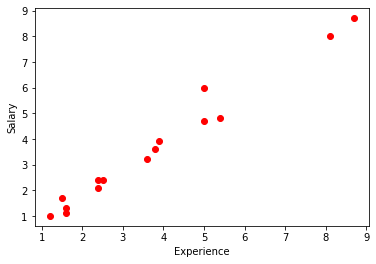

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

x = np.array([2.4,5.0,1.5,3.8,8.7,3.6,1.2,8.1,2.5,5,1.6,1.6,2.4,3.9,5.4])
y = np.array([2.1,4.7,1.7,3.6,8.7,3.2,1.0,8.0,2.4,6,1.1,1.3,2.4,3.9,4.8])
n = np.size(x)

experience = x
salary = y

plt.scatter(experience,salary, color = 'red')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

#### Vamos a tomar como resultado base el que arroja scikit-learn

In [2]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

x = x.reshape(-1,1)
y = y.reshape(-1,1)

lin_reg.fit(x,y)
print ('Intercepto: ', lin_reg.intercept_)
print ('Pendiente: ',lin_reg.coef_)

Intercepto:  [-0.2135415]
Pendiente:  [[1.02474643]]


Coeficiente de determinación (R^2) =  0.976327235894276


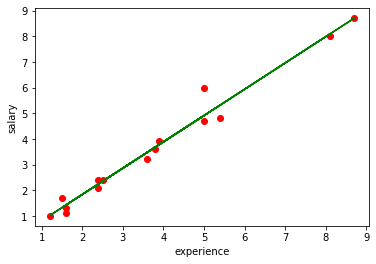

In [3]:
pred = lin_reg.intercept_ + lin_reg.coef_*x
plt.scatter(experience,salary,color = 'red')
plt.plot(experience,pred, color = 'green')
plt.xlabel("experience")
plt.ylabel("salary")

print('Coeficiente de determinación (R^2) = ',lin_reg.score(x,y))

#### Ahora vamos a implementar el método de mínimos cuadrados y vamos a comparar con el resultado obtenido mediante scikit-learn.

In [4]:
n = len(x)
sum_xy = sum(np.multiply(x,y))
sum_x = sum(x)
sum_y = sum(y)
sum_x2 = sum(np.multiply(x,x))
sum_abs_x2 = sum(abs(x))*sum(abs(x))
             
theta_1 = ((n*sum_xy)-(sum_x*sum_y))/(n*sum_x2-sum_abs_x2)
theta_0 = ((sum_y*sum_x2)-(sum_x*sum_xy))/(n*sum_x2-sum_abs_x2)

print('Parámetro theta_0: ',theta_0)
print('Parámetro theta_1: ',theta_1)

Parámetro theta_0:  [-0.2135415]
Parámetro theta_1:  [1.02474643]


### METODO 2
### Formulación vectorial: regresión lineal simple y regresión lineal múltiple

Los parámetros se pueden hallar directamente haciendo una formulación vectorial, tal como se muestra en las siguientes figuras (fuente: https://www.kaggle.com/sudhirnl7/linear-regression-tutorial/notebook).

![mat_for_1.png](img/mat_for_1.png)

Posteriormente,

![mat_for_2.png](img/mat_for_2.png)

Luego se usa el método de solución por la ecuación normal,

![mat_for_3.png](img/mat_for_3.png)

![mat_for_4.png](img/mat_for_4.png)

Al final los parámetros de la función de hipótesis se pueden encontrar como:

$$\mathbf{\theta = (X^TX)^{-1}(X^Ty)}$$

En este método de solución se presentan las siguientes restricciones:

- Se necesita que $\mathbf{(X^TX)}$ sea invertible.
- Si $\mathbf{X}$ es muy grande, puede tardarse mucho tiempo en hacer los cálculos.

#### Teniendo como base el ejemplo anterior, ahora vamos a implementar el método matricial y vamos a comparar con el resultado obtenido mediante scikit-learn.

In [5]:
x_mod = np.c_[np.ones((x.shape[0],1)),x]

In [6]:
theta = np.matmul(np.linalg.inv( np.matmul(x_mod.T,x_mod) ), np.matmul(x_mod.T,y)) 

print ('Intercepto: ', theta[0])
print ('Pendiente: ',theta[1])

Intercepto:  [-0.2135415]
Pendiente:  [1.02474643]


### METODO 3
### Algoritmo de gradiente descendente: cualquier función de costo

**Función de costo:**

\begin{equation}
J = \frac{1}{m}\sum\limits_{j = 1}^m {{{\left( {y^{(j)} - {{\hat y^{(j)}}}} \right)}^2}} \\
\end{equation}

**Derivadas parciales de la función de costo respecto a los parámetros:**

\begin{equation}
\frac{{\partial J}}{{\partial {\theta_0}}} =  - \frac{2}{m}\sum\limits_{j = 1}^m {\left( {y^{(j)} - {\hat y^{(j)}}} \right)} \\
\end{equation}

\begin{equation}
\frac{{\partial J}}{{\partial {\theta_1}}} =  - \frac{2}{m}\sum\limits_{j = 1}^m {\left[ {\left( y^{(j)} - {\hat y^{(j)}} \right)x_1^{(j)}} \right]} \\
\end{equation}

**Gradiente:**

\begin{equation}
\nabla J = \left[ {\begin{array}{*{20}{c}}
{\frac{{\partial J}}{{\partial {\theta_0}}}}\\
{\frac{{\partial J}}{{\partial {\theta_1}}}}
\end{array}} \right]\\
\end{equation}

**Actualización de los coeficientes del modelo usando gradiente descendente:**

\begin{equation}
{\theta_{\text{iteracion} + 1}} = {\theta_{\text{iteracion}}} - \alpha \nabla J
\end{equation}

Donde $\alpha$ es la tasa de aprendizaje.


#### Teniendo como base el ejemplo anterior, ahora vamos a implementar el método de gradiente descendente y vamos a comparar con el resultado obtenido mediante scikit-learn.

In [7]:
#initialize the parameters
theta_0 = 0                  #intercept
theta_1 = 0                  #Slop
lr = 0.0001             #Learning rate
iterations = 1000       # Number of iterations
error = []              # Error array to calculate cost for each iterations.
for itr in range(iterations):
    error_cost = 0
    cost_theta_0 = 0
    cost_theta_1 = 0
    for i in range(len(experience)):
        y_pred = theta_0 + theta_1*experience[i]   # predict value for given x
        error_cost = error_cost +(salary[i]-y_pred)**2
        for j in range(len(experience)):
            partial_wrt_theta_0 = -2 *(salary[j] - (theta_0 + theta_1*experience[j]))                #partial derivative w.r.t a0
            partial_wrt_theta_1 = (-2*experience[j])*(salary[j]-(theta_0 + theta_1*experience[j]))   #partial derivative w.r.t a1
            cost_theta_0 = cost_theta_0 + partial_wrt_theta_0      #calculate cost for each number and add
            cost_theta_1 = cost_theta_1 + partial_wrt_theta_1      #calculate cost for each number and add
        theta_0 = theta_0 - lr * cost_theta_0    #update a0
        theta_1 = theta_1 - lr * cost_theta_1    #update a1
        print(itr,theta_0,theta_1)          #Check iteration and updated a0 and a1
    error.append(error_cost)      #Append the data in array

0 0.010979999999999998 0.056942
0 0.03226133772 0.16740283674
0 0.06252754325820839 0.324742183577907
0 0.09990358980486869 0.5195021533805978
0 0.14206877116277838 0.7399764567295632
0 0.18639641318788652 0.9729148640751992
0 0.23011201141481824 1.2043205780194084
0 0.2704602782527654 1.4202925306695091
0 0.3048710469581621 1.6078619174625388
0 0.33111404837865904 1.7557726257044581
0 0.3474332460785315 1.8551585924307041
0 0.35265264560200416 1.9000773288869088
0 0.3462472102790932 1.8878675046795683
0 0.3283746158222787 1.8193090725615755
0 0.29986593263514916 1.6985762977266659
1 0.29068447962102334 1.6537192931232776
1 0.27285779638401647 1.5667079678703553
1 0.2474260714022077 1.4427850426277087
1 0.2158708858227941 1.2894177682159378
1 0.1800260900943434 1.1158485466461872
1 0.1419674935766419 0.932538722907553
1 0.10388800546043882 0.7505390195737253
1 0.06796574084588837 0.5808245008540702
1 0.03623302916911511 0.43363408729874653
1 0.010454207854866723 0.3178543685154287
1 -0

In [8]:
print ('Intercepto: ', theta_0)
print ('Pendiente: ',theta_1)

Intercepto:  -0.21354150071690242
Pendiente:  1.0247464287610857


# REGRESIÓN LINEAL SIMPLE

## 0. Importar librerías.

In [9]:
#Librerías de interés.
import pandas as pd                  #Importamos la librería pandas. Nos va a servir para leer y manipular conjuntos de datos tabulares.
import matplotlib.pyplot as plt      #Importamos pyplot de librería matplotlib. Lo vamos a utilizar para graficar.
import seaborn as sns                #Importamos la librería Seaborn. La vamos a utilizar para graficar.
import numpy as np                   #Importamos la librería numpy para manipular arreglos. 

#from google.colab import files       #Esta librería nos sirve para cargar archivos desde el disco duro.

from sklearn.model_selection import train_test_split #Útil para dividir los conjuntos de datos. 
from sklearn.preprocessing import MinMaxScaler       #Útil para escalar los atributos de entrada.
from sklearn import metrics

from copy import deepcopy                            #Permite hacer copias profundas. 

#!pip install yellowbrick --upgrade                   #Instala y actualiza la librería yellowbrick (la versión por defecto en Google Colab está desactualizada).

from numpy.random import default_rng                 #Generador de números pseudo aleatorios.

%matplotlib inline

## 1. Datos

### 1.1 Descripción

Dataset que relaciona las edades (años) con la altura (pulgadas) para niños y jóvenes entre 0 y 18 años.

In [10]:
df = pd.read_pickle('AgesAndHeights.pkl')

## 2. Análisis Exploratorio

### 2.1 Información básica

In [11]:
df.shape

(100, 2)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     100 non-null    float64
 1   Height  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [13]:
df.describe()

,Age,Height
count,100.000000,100.000000
mean,7.966138,45.955674
std,5.321621,10.787318
min,-0.780853,27.332513
25%,3.048885,36.320107
50%,7.795597,46.178251
75%,11.464331,53.994166
max,17.887852,68.170414


In [14]:
df.head()

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414


In [15]:
df.tail()

,Age,Height
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154
99,13.117413,55.177407


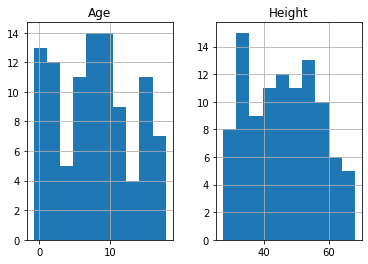

In [16]:
df.hist()
plt.show()

### 2.2 Limpieza

In [17]:
df_clean = df[df['Age'] > 0]

In [18]:
df_clean.shape

(93, 2)

In [19]:
df_clean.loc[:,'Height'] = df_clean['Height'].values*2.54

/var/folders/m1/y83lzzrj3g9cwk3vm5gds84r0000gn/T/ipykernel_66044/3360852707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:,'Height'] = df_clean['Height'].values*2.54


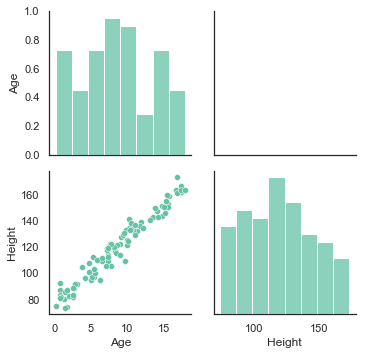

In [20]:
sns.set(style='white')
sns.set_palette('Set2')

g = sns.PairGrid(data=df_clean,diag_sharey=False, corner=False)

g.map_diag(sns.histplot) #Muestra el histograma en la diagonal principal.
g.map_lower(sns.scatterplot) #Muestra gráficos de dispersión en la sección inferior izquierda de la matriz.

g.add_legend()

plt.show()

## 3. Modelo

### 3.1 Creación del Modelo

In [21]:
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()

### 3.2 Preaparación y Particionamiento de los datos

- Crear los conjutos de entrenamiento y prueba (se puede crear también uno de validación, de acuerdo a la metodología que se esté utilizando).
- Revisar dimensiones y tipos, de tal forma que se puedan usar en las siguientes etapas.
- Normalizar si se considera necesario.

In [22]:
from sklearn.model_selection import train_test_split

y = df_clean['Height'].values
X = df_clean['Age'].values

print(y.shape)
print(X.shape)

(93,)
(93,)


In [23]:
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)
print(y.shape)
print(X.shape)

(93, 1)
(93, 1)


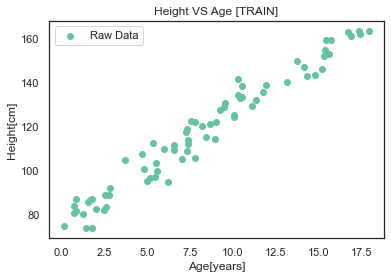

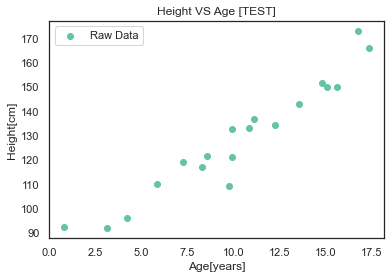

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

plt.scatter(X_train,y_train, label='Raw Data')
plt.title('Height VS Age [TRAIN]')
plt.xlabel('Age[years]')
plt.ylabel('Height[cm]')
plt.legend()
plt.show()

plt.scatter(X_test,y_test, label='Raw Data')
plt.title('Height VS Age [TEST]')
plt.xlabel('Age[years]')
plt.ylabel('Height[cm]')
plt.legend()
plt.show()

### 3.3 Entrenar Modelo

In [25]:
lin_reg_model.fit(X_train,y_train)
print('intercept [w0]=', lin_reg_model.intercept_)
print('slope [w1]=', lin_reg_model.coef_)

intercept [w0]= [75.63050217]
slope [w1]= [[5.11913056]]


## 4. Evaluación

### 4.1 Evaluar el modelo en el conjunto de entrenamiento

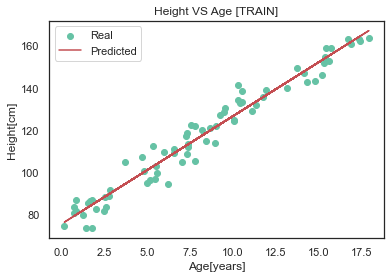

coefficient R^2 for training data: 0.9596


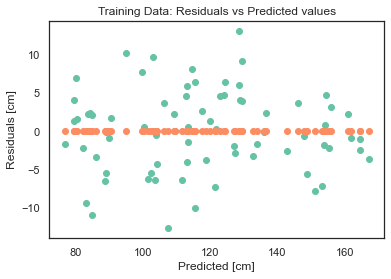

MSE= 27.1483
RMSE: 5.2104


In [26]:
y_pred_train = lin_reg_model.predict(X_train)

plt.scatter(X_train, y_train, label='Real')
plt.plot(X_train,y_pred_train,'r', label='Predicted')
plt.title('Height VS Age [TRAIN]')
plt.xlabel('Age[years]')
plt.ylabel('Height[cm]')
plt.legend()
plt.show()

r_sq = lin_reg_model.score(X_train, y_train)
print('coefficient R^2 for training data: %.4f' % r_sq)

e_train = y_train - y_pred_train

plt.scatter(y_pred_train,e_train)
a = np.zeros(len(e_train))
a = a.reshape(-1,1)
plt.scatter(y_pred_train,a)
plt.title('Training Data: Residuals vs Predicted values')
plt.ylabel('Residuals [cm]')
plt.xlabel('Predicted [cm]')
plt.show()

mse = metrics.mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
print('MSE= %.4f'% mse)
print('RMSE: %.4f' % rmse)

### 4.2 Evaluar el modelo en el conjunto de prueba

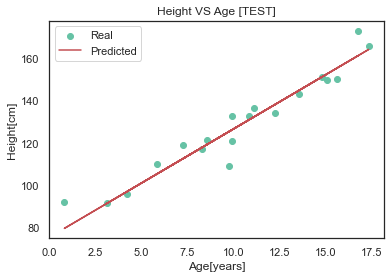

coefficient R^2 for test data: 0.9223


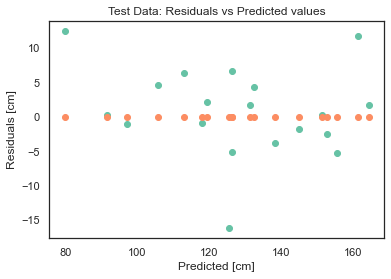

MSE= 40.6577
RMSE: 6.3763


In [27]:
y_pred_test = lin_reg_model.predict(X_test)

plt.scatter(X_test, y_test, label='Real')
plt.plot(X_test,y_pred_test,'r', label='Predicted')
plt.title('Height VS Age [TEST]')
plt.xlabel('Age[years]')
plt.ylabel('Height[cm]')
plt.legend()
plt.show()

r_sq = lin_reg_model.score(X_test, y_test)
print('coefficient R^2 for test data: %.4f' % r_sq)

e_test = y_test - y_pred_test

plt.scatter(y_pred_test,e_test)
b = np.zeros(len(e_test))
b = b.reshape(-1,1)
plt.scatter(y_pred_test,b)
plt.title('Test Data: Residuals vs Predicted values')
plt.ylabel('Residuals [cm]')
plt.xlabel('Predicted [cm]')
plt.show()

mse = metrics.mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print('MSE= %.4f'% mse)
print('RMSE: %.4f' % rmse)

#### **Pregunta 1.1**

Encuentre los parámetros del modelo de regresión lineal simple para el problema anterior, utilizando el método de mínimos cuadrados.

In [28]:
n = len(X_train)
sum_xy = sum(np.multiply(X_train,y_train))
sum_x = sum(X_train)
sum_y = sum(y_train)
sum_x2 = sum(np.multiply(X_train,X_train))
sum_abs_x2 = sum(abs(X_train))*sum(abs(X_train))
             
theta_1 = ((n*sum_xy)-(sum_x*sum_y))/(n*sum_x2-sum_abs_x2)
theta_0 = ((sum_y*sum_x2)-(sum_x*sum_xy))/(n*sum_x2-sum_abs_x2)

print('Parámetro theta_0: ',theta_0)
print('Parámetro theta_1: ',theta_1)

Parámetro theta_0:  [75.63050217]
Parámetro theta_1:  [5.11913056]


#### **Pregunta 1.2**

Encuentre los parámetros del modelo de regresión lineal simple para el problema anterior, utilizando el método matricial.

In [29]:
x_mod = np.c_[np.ones((X_train.shape[0],1)),X_train]

theta = np.matmul(np.linalg.inv( np.matmul(x_mod.T,x_mod)), np.matmul(x_mod.T,y_train)) 

print ('Intercepto: ', theta[0])
print ('Pendiente: ',theta[1])

Intercepto:  [75.63050217]
Pendiente:  [5.11913056]


#### **Pregunta 1.3**

Encuentre los parámetros del modelo de regresión lineal simple para el problema anterior, utilizando el método de gradiente descendente. Trate de utilizar la menor cantidad de iteraciones posibles que permitan llegar a una solución adecuada.

In [30]:
#initialize the parameters
theta_0 = 0                  #intercept
theta_1 = 0                  #Slop
lr = 0.0001             #Learning rate
iterations = 15         # Number of iterations
error = []              # Error array to calculate cost for each iterations.
for itr in range(iterations):
    error_cost = 0
    cost_theta_0 = 0
    cost_theta_1 = 0
    for i in range(len(X_train)):
        y_pred = theta_0 + theta_1*X_train[i]   # predict value for given x
        error_cost = error_cost +(y_train[i]-y_pred)**2
        for j in range(len(X_train)):
            partial_wrt_theta_0 = -2 *(y_train[j] - (theta_0 + theta_1*X_train[j]))                #partial derivative w.r.t a0
            partial_wrt_theta_1 = (-2*X_train[j])*(y_train[j]-(theta_0 + theta_1*X_train[j]))   #partial derivative w.r.t a1
            cost_theta_0 = cost_theta_0 + partial_wrt_theta_0      #calculate cost for each number and add
            cost_theta_1 = cost_theta_1 + partial_wrt_theta_1      #calculate cost for each number and add
        theta_0 = theta_0 - lr * cost_theta_0    #update a0
        theta_1 = theta_1 - lr * cost_theta_1    #update a1
        print(itr,theta_0,theta_1)          #Check iteration and updated a0 and a1
    error.append(error_cost)      #Append the data in array

0 [1.73824107] [16.06246582]
0 [3.24702393] [26.26840091]
0 [3.27010757] [16.64180435]
0 [2.97101857] [0.19048127]
0 [4.34317013] [-0.81501646]
0 [7.48782042] [14.81837261]
0 [10.46833122] [25.58152359]
0 [11.93931183] [16.56740992]
0 [12.96880997] [-0.2190025]
0 [15.57108849] [-2.21490776]
0 [19.94894124] [12.96259317]
0 [24.20259611] [24.27142431]
0 [26.90184639] [15.91313335]
0 [29.0172716] [-1.14217472]
0 [32.57957269] [-4.09956452]
0 [37.89357993] [10.60726637]
0 [43.10257077] [22.45918248]
0 [46.69653982] [14.80823663]
0 [49.5473058] [-2.4396342]
0 [53.69796772] [-6.31814472]
0 [59.55601283] [7.91279254]
0 [65.31420296] [20.31144985]
0 [69.38830286] [13.42454614]
0 [72.5506516] [-3.93265291]
0 [76.8529547] [-8.68377285]
0 [82.80595475] [5.07229454]
0 [88.65842063] [18.02414034]
0 [92.75784061] [11.95943676]
0 [95.77677392] [-5.42083663]
0 [99.77183836] [-10.99178071]
0 [105.35744147] [2.29287199]
0 [110.84478426] [15.80326055]
0 [114.51923025] [10.61631596]
0 [116.9535061] [-6.70

In [31]:
print ('Intercepto: ', theta_0)
print ('Pendiente: ',theta_1)

Intercepto:  [75.63050217]
Pendiente:  [5.11913055]


# REGRESIÓN LINEAL MÚLTIPLE

## 1. Datos

In [32]:
#Vamos a utilizar el dataset auto-mpg (https://www.kaggle.com/datasets/uciml/autompg-dataset)
# Vamos a leer el conjunto de datos en un dataframe de pandas.
df = pd.read_csv('auto-mpg.csv',    #Ruta completa a la ubicación del archivo de interés.  
                 na_values='?')              #Como el archivo contiene algunos caracteres ?, con este comando pandas los interpreta como nan (not a number).

## **2. Análisis Exploratorio de los Datos.**

### 2.1 Información básica

In [33]:
df.shape

(398, 9)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [35]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [36]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [37]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,1,chevy s-10


### 2.2 Limpieza

In [38]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [39]:
df_clean = df.dropna()

In [40]:
df_clean.shape

(392, 9)

### 2.3 Correlaciones

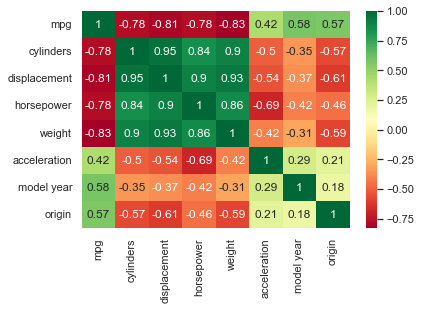

In [41]:
ax = sns.heatmap(df_clean.corr(),annot=True,cmap='RdYlGn')

#### Pregunta 2.1

Organice en orden descendente los predictores de acuerdo con su correlación con la variable target.

In [42]:
df_mod = df_clean # Creamos una copia de la base de datos.
df_mod = df_mod.rename(columns={'mpg': 'kpg'}) # Renombramos la columna mpg por kpg.
df_mod['kpg'] = df_mod['kpg'].apply(lambda x : x * 1.609344) # Multiplicamos la columna kpg por 1.609344.
df_mod.describe() # Imprimimos la base de datos modificada.

,kpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,37.732548,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,12.560942,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,14.484096,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,27.358848,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,36.612576,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,46.670976,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,74.995430,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [43]:
corr_matrix = df_mod.corr()
sorted_corr = corr_matrix.sort_values(by='kpg', ascending=False)
sorted_corr_by_kpg = sorted_corr['kpg']

print("Correlation with 'kpg' attribute in descendant order",sorted_corr_by_kpg,sep="\n")

Correlation with 'kpg' attribute in descendant order
kpg             1.000000
model year      0.580541
origin          0.565209
acceleration    0.423329
cylinders      -0.777618
horsepower     -0.778427
displacement   -0.805127
weight         -0.832244
Name: kpg, dtype: float64


#### Pregunta 2.2

Identifique cuáles predictores se pueden considerar que tienen una alta correlación.

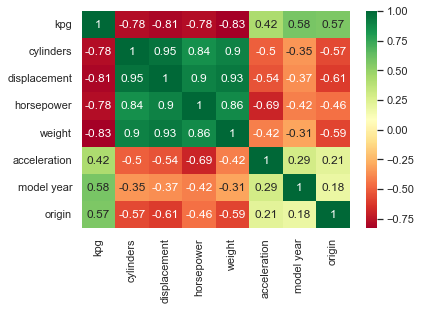

In [44]:
ax = sns.heatmap(df_mod.corr(),annot=True,cmap='RdYlGn')

In [45]:
greatest_corr = corr_matrix.unstack().where(lambda x: (x > 0.85) & (x < 1)).dropna().sort_values(ascending=False)
print("Correlation greater than 0.85",greatest_corr,sep="\n")

Correlation greater than 0.85
cylinders     displacement    0.950823
displacement  cylinders       0.950823
              weight          0.932994
weight        displacement    0.932994
cylinders     weight          0.897527
weight        cylinders       0.897527
displacement  horsepower      0.897257
horsepower    displacement    0.897257
              weight          0.864538
weight        horsepower      0.864538
dtype: float64


## **3. Modelo.**

#### Pregunta 3.1

Cree un modelo de regresión lineal con las siguientes características:

Predictores:

- cylinders
- displacement
- horsepower
- weight
- acceleration
- model year
- origin

Particione los datos en 80% entrenamiento y 20% validación. Utilice como semilla el número 21.

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lin_reg_model = LinearRegression()

x = df_mod[['cylinders','displacement','horsepower','weight','acceleration','model year','origin']]
y = df_mod['kpg']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

lin_reg_model.fit(X_train,y_train)

print('Intercept: ', lin_reg_model.intercept_)
print('Coefficients: ')
list(zip(x,lin_reg_model.coef_))




Intercept:  -29.361873175277175
Coefficients: 


[('cylinders', -0.6901035108007146),
 ('displacement', 0.036699196358274455),
 ('horsepower', -0.03265706693022586),
 ('weight', -0.0108112253711873),
 ('acceleration', 0.20178809608825307),
 ('model year', 1.2173092154647172),
 ('origin', 2.2693941390818)]

## **4. Evaluación.**

#### Pregunta 4.1

Evalúe el modelo creado usando los datos de entrenamiento. Utilice como métricas de desempeño el coeficiente de correlación, la gráfica de residuos, y el RMSE. Consigne las observaciones que considere pertinentes.

coefficient R^2 for training data: 0.8168


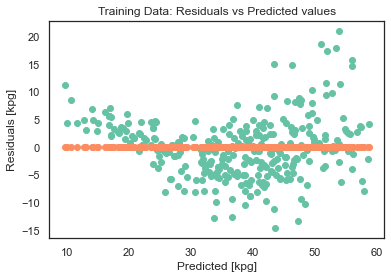

MSE= 29.0020
RMSE: 5.3854


In [47]:
y_pred_train = lin_reg_model.predict(X_train)


r_sq = lin_reg_model.score(X_train, y_train)
print('coefficient R^2 for training data: %.4f' % r_sq)

e_train = y_train - y_pred_train
plt.scatter(y_pred_train,e_train)
a = np.zeros(len(e_train))
a = a.reshape(-1,1)
plt.scatter(y_pred_train,a)
plt.title('Training Data: Residuals vs Predicted values')
plt.ylabel('Residuals [kpg]')
plt.xlabel('Predicted [kpg]')
plt.show()

mse = metrics.mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
print('MSE= %.4f'% mse)
print('RMSE: %.4f' % rmse)


**Obersvaciones**

Se observa que el coeficiente de correlación es de 0.82, lo que indica que el modelo es bueno porque es cercano a 1. Los datos estan distribuidos de forma aleatoria por lo que se puede decir que es un buen modelo de entrenamiento. El RMSE es de 5.38, lo que significa que el modelo tiene buen ajuste.


#### Pregunta 4.2

Evalúe el modelo creado usando los datos de prueba. Utilice como métricas de desempeño el coeficiente de correlación, la gráfica de residuos, y el RMSE. Consigne las observaciones que considere pertinentes.

coefficient R^2 for test data: 0.8375


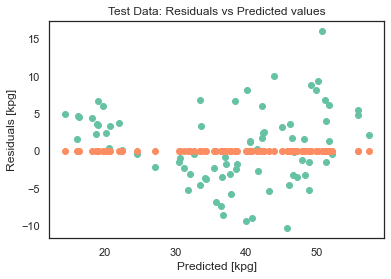

MSE= 24.9354
RMSE: 4.9935


In [48]:
y_pred_test = lin_reg_model.predict(X_test)

r_sq = lin_reg_model.score(X_test, y_test)
print('coefficient R^2 for test data: %.4f' % r_sq)

e_test = y_test - y_pred_test

plt.scatter(y_pred_test,e_test)
b = np.zeros(len(e_test))
b = b.reshape(-1,1)
plt.scatter(y_pred_test,b)
plt.title('Test Data: Residuals vs Predicted values')
plt.ylabel('Residuals [kpg]')
plt.xlabel('Predicted [kpg]')
plt.show()

mse = metrics.mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print('MSE= %.4f'% mse)
print('RMSE: %.4f' % rmse)

**Observaciones**

El modelo iene un buen rendimiento dado su coeficiente de correlación que es de  0.84 y el RMSE es de 4.99, lo que indica que el modelo tiene un buen ajuste para estos datos

#### Pregunta 4.3

Indique qué conclusión puede sacar sobre el desempeño de este modelo.

**Conclusiones**

El desempeño de este modelo es bueno dado los valores de prueba donde se puede decir que tiene un buen nivel de precisión los valores de la variable 'kpg'.

## 5. Crear nuevos modelos y evaluarlos.

#### Pregunta 5.1

Cree uno modelo de regresión lineal con las siguientes características:

Predictores:

- cylinders
- displacement
- horsepower
- weight
- acceleration
- model year
- origin

Normalice todos los predictores.

Particione los datos en 80% entrenamiento y 20% validación. Utilice como semilla el número 21.

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

lin_reg_model = LinearRegression()

x = df_mod[['cylinders','displacement','horsepower','weight','acceleration','model year','origin']]
y = df_mod['kpg']

normalized_x=(x-x.mean())/x.std()
normalized_x=(x-x.min())/(x.max()-x.min())

X_train, X_test, y_train, y_test = train_test_split(normalized_x, y, test_size=0.2, random_state=21)

lin_reg_model.fit(X_train,y_train)

print('Intercept: ', lin_reg_model.intercept_)
print('Coefficients: ')
list(zip(x,lin_reg_model.coef_))

Intercept:  41.21797403248601
Coefficients: 


[('cylinders', -3.450517554003565),
 ('displacement', 14.202588990653233),
 ('horsepower', -6.008900315163064),
 ('weight', -38.13119188417767),
 ('acceleration', 3.3900400142826994),
 ('model year', 14.6077105855766),
 ('origin', 4.538788278163589)]

#### Pregunta 5.2

Evalúe el modelo creado usando los datos de entrenamiento. Utilice como métricas de desempeño el coeficiente de correlación, la gráfica de residuos, y el RMSE. Consigne las observaciones que considere pertinentes.

coefficient R^2 for training data: 0.8168


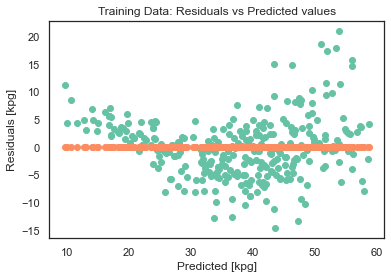

MSE= 29.0020
RMSE: 5.3854


In [50]:
y_pred_train = lin_reg_model.predict(X_train)


r_sq = lin_reg_model.score(X_train, y_train)
print('coefficient R^2 for training data: %.4f' % r_sq)

e_train = y_train - y_pred_train
plt.scatter(y_pred_train,e_train)
a = np.zeros(len(e_train))
a = a.reshape(-1,1)
plt.scatter(y_pred_train,a)
plt.title('Training Data: Residuals vs Predicted values')
plt.ylabel('Residuals [kpg]')
plt.xlabel('Predicted [kpg]')
plt.show()

mse = metrics.mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
print('MSE= %.4f'% mse)
print('RMSE: %.4f' % rmse)

#### Pregunta 5.3

Evalúe el modelo creado usando los datos de prueba. Utilice como métricas de desempeño el coeficiente de correlación, la gráfica de residuos, y el RMSE. Consigne las observaciones que considere pertinentes.

coefficient R^2 for test data: 0.8375


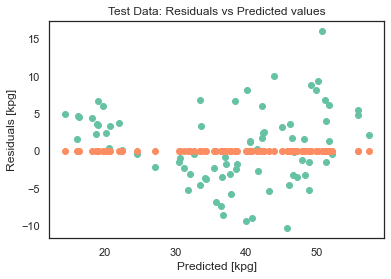

MSE= 24.9354
RMSE: 4.9935


In [51]:
y_pred_test = lin_reg_model.predict(X_test)

r_sq = lin_reg_model.score(X_test, y_test)
print('coefficient R^2 for test data: %.4f' % r_sq)

e_test = y_test - y_pred_test

plt.scatter(y_pred_test,e_test)
b = np.zeros(len(e_test))
b = b.reshape(-1,1)
plt.scatter(y_pred_test,b)
plt.title('Test Data: Residuals vs Predicted values')
plt.ylabel('Residuals [kpg]')
plt.xlabel('Predicted [kpg]')
plt.show()

mse = metrics.mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print('MSE= %.4f'% mse)
print('RMSE: %.4f' % rmse)

#### Pregunta 5.4

Compare el desempeño de este modelo con el creado en el punto 3.1. Consigne las observaciones que considere pertinentes.

En comparación con el modelo creado en el punto 3.1, se puede apreciar que los resultados de las métricas de desempeño son iguales, de modo que ambos modelos tienen un buen rendimiento. Cabe destacar que sus coeficientes y su intercepto serán más pequeños, lo que indica que el modelo es más preciso para valores normalizados

# **EJERCICIOS PROPUESTOS TALLER 4.**

## **Ejercicio 1.**

Entrene diferentes modelos usando varias combinaciones de predictores. La idea es superar el resultado obtenido con el modelo que empleaba todos los predictores y además usar la menor cantidad de predictores posible.

Consigne todo el procedimiento llevado a cabo para construir el modelo final. Además, indique por qué seleccionó los predictores y descartó otros. Tenga en cuenta que puede normalizar los atributos, procesar outliers, etc.

Los resultados serán socializados y se determinará cuál es el grupo ganador.

In [58]:
lin_reg_model = LinearRegression()

x = df_mod[['cylinders','horsepower','weight','acceleration','model year','origin']]
y = df_mod['kpg']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

lin_reg_model.fit(X_train,y_train)

print('Intercept: ', lin_reg_model.intercept_)
print('Coefficients: ')
list(zip(x,lin_reg_model.coef_))

Intercept:  -29.790402495599857
Coefficients: 


[('cylinders', 0.3660129754128699),
 ('horsepower', -0.01577879912799787),
 ('weight', -0.009545708897696435),
 ('acceleration', 0.12972662588909958),
 ('model year', 1.1916246842661355),
 ('origin', 1.831934966124834)]

coefficient R^2 for training data: 0.8122


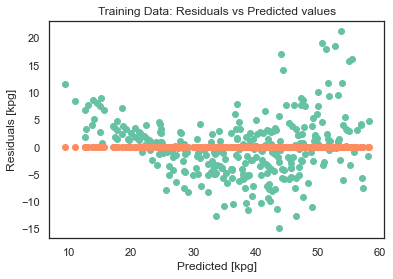

MSE= 29.7231
RMSE: 5.4519


In [59]:
y_pred_train = lin_reg_model.predict(X_train)


r_sq = lin_reg_model.score(X_train, y_train)
print('coefficient R^2 for training data: %.4f' % r_sq)

e_train = y_train - y_pred_train
plt.scatter(y_pred_train,e_train)
a = np.zeros(len(e_train))
a = a.reshape(-1,1)
plt.scatter(y_pred_train,a)
plt.title('Training Data: Residuals vs Predicted values')
plt.ylabel('Residuals [kpg]')
plt.xlabel('Predicted [kpg]')
plt.show()

mse = metrics.mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
print('MSE= %.4f'% mse)
print('RMSE: %.4f' % rmse)

coefficient R^2 for training data: 0.8398


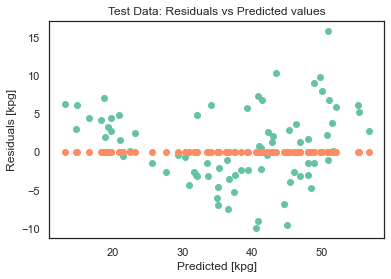

MSE= 24.5830
RMSE: 4.9581


In [60]:
y_pred_test = lin_reg_model.predict(X_test)

r_sq = lin_reg_model.score(X_test, y_test)
print('coefficient R^2 for training data: %.4f' % r_sq)

e_train = y_test - y_pred_test
plt.scatter(y_pred_test,e_train)
a = np.zeros(len(e_train))
a = a.reshape(-1,1)
plt.scatter(y_pred_test,a)
plt.title('Test Data: Residuals vs Predicted values')
plt.ylabel('Residuals [kpg]')
plt.xlabel('Predicted [kpg]')
plt.show()

mse = metrics.mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print('MSE= %.4f'% mse)
print('RMSE: %.4f' % rmse)

Al sacar las correlaciones entre los atributos con correlacion mayor a 0.85 (sea directamente o inversamente proporcional), se puede evidenciar que existen variables co-dependientes con correlaciones altas las cualese se pueden eliminar con el objetivo de no tener variables redundantes. Una de estas variables es 'displacement' la cual su alta correlacion se repite.

Al eliminar este atributo, obtenemos un mejor resultado a comparacion del ejercicio anterior por lo que es un metodo mas eficiente con un R2 de 0.83

In [88]:
great_corr = corr_matrix.unstack().where(lambda x: (x > 0.89) & (x < 1)).dropna().sort_values(ascending=False)
print("Correlation greater than 1",great_corr,sep="\n")

Correlation greater than 1
cylinders     displacement    0.950823
displacement  cylinders       0.950823
              weight          0.932994
weight        displacement    0.932994
cylinders     weight          0.897527
weight        cylinders       0.897527
displacement  horsepower      0.897257
horsepower    displacement    0.897257
dtype: float64


In [89]:
lin_reg_model = LinearRegression()

x = df_mod[['cylinders','displacement','weight', 'horsepower']]
y = df_mod['kpg']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

lin_reg_model.fit(X_train,y_train)

print('Intercept: ', lin_reg_model.intercept_)
print('Coefficients: ')
list(zip(x,lin_reg_model.coef_))

Intercept:  73.47972987704884
Coefficients: 


[('cylinders', -0.27836667173454543),
 ('displacement', -0.0010828963732909518),
 ('weight', -0.008669531296047743),
 ('horsepower', -0.07929358291343308)]

coefficient R^2 for training data: 0.7270


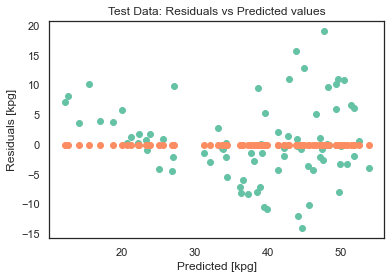

MSE= 41.8936
RMSE: 6.4725


In [90]:
y_pred_test = lin_reg_model.predict(X_test)

r_sq = lin_reg_model.score(X_test, y_test)
print('coefficient R^2 for training data: %.4f' % r_sq)

e_train = y_test - y_pred_test
plt.scatter(y_pred_test,e_train)
a = np.zeros(len(e_train))
a = a.reshape(-1,1)
plt.scatter(y_pred_test,a)
plt.title('Test Data: Residuals vs Predicted values')
plt.ylabel('Residuals [kpg]')
plt.xlabel('Predicted [kpg]')
plt.show()

mse = metrics.mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print('MSE= %.4f'% mse)
print('RMSE: %.4f' % rmse)

Al sacar las correlaciones entre los atributos con correlacion mayor a 0.89 (sea directamente o inversamente proporcional), se puede evidenciar que existen variables co-dependientes con correlaciones altas las cuales se pueden eliminar con el objetivo de no tener variables redundantes. De esta manera se dejaron las variables 'cylinders','displacement','weight' y 'horsepower'.

Al eliminar este atributo, no obtenemos un mejor resultado a comparacion del ejercicio por lo que se puede descartar.

# **Metodología**

1. Desarrolle de forma individual las preguntas propuestas en el Taller 4.

2. Después de la sesión de Taller 4, suba a Intu el archivo con la solución a las preguntas con nombre en el siguiente formato:

Taller_4_Apellido-Nombre.ipynb

3. Resuelva los Ejercicios Propuestos (en grupos de máximo 2 personas) en un nuevo notebook de Jupyter y suba el archivo a Intu hasta el próximo miércoles 28 de septiembre a las 7:00 am (antes del inicio de la clase). Utilice el siguiente formato para el nombre del archivo.

Ejercicios_Taller_4_Apellido-Nombre_Apellido-Nombre.ipynb

4.	Recuerde consignar los nombres de los integrantes dentro del notebook.

5.	Algunos grupos serán llamados al azar durante la clase del miércoles 28 de septiembre para realizar la presentación de alguno (s) de los puntos.

6. La nota del Taller 4 se asignará así:

- Preguntas Taller 2 (20%)

- Ejercicios Taller 2 (80%)
